# 보스턴 집값 데이터 회귀분석(라쏘, 릿지, 엘라스틱넷)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("http://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv")

In [3]:
data.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


- [01] CRIM 자치시(town) 별 1인당 범죄율
- [02] ZN 25,000 평방피트를 초과하는 거주지역의 비율
- [03] INDUS 비소매상업지역이 점유하고 있는 토지의 비율
- [04] CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
- [05] NOX 10ppm 당 농축 일산화질소
- [06] RM 주택 1가구당 평균 방의 개수
- [07] AGE 1940년 이전에 건축된 소유주택의 비율
- [08] DIS 5개의 보스턴 직업센터까지의 접근성 지수
- [09] RAD 방사형 도로까지의 접근성 지수
- [10] TAX 10,000 달러 당 재산세율
- [11] PTRATIO 자치시(town)별 학생/교사 비율
- [12] B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
- [13] LSTAT 모집단의 하위계층의 비율(%)
- [14] MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [4]:
des = data.describe()
des

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
des.loc['75%'] + 1.5 * (des.loc['75%'] - des.loc['25%'])

범죄율                9.069639
25,000평방피트초과      31.250000
비소매상업지역비율         37.465000
찰스강경계              0.000000
농축 일산화질소           0.886500
가구당평균방수            7.730500
1940년이전건축비율      167.650000
직업센터접근성            9.820800
도로접근성             54.000000
재산세율            1246.500000
학생/교사비율           24.400000
흑인비율             427.496250
하위계층비율            31.962500
주택가격              36.962500
dtype: float64

In [6]:
des.loc['25%'] - 1.5 * (des.loc['75%'] - des.loc['25%'])

범죄율              -5.310511
25,000평방피트초과    -18.750000
비소매상업지역비율       -14.175000
찰스강경계             0.000000
농축 일산화질소          0.186500
가구당평균방수           4.778500
1940년이전건축비율     -28.550000
직업센터접근성          -2.532200
도로접근성           -26.000000
재산세율           -301.500000
학생/교사비율          13.200000
흑인비율            344.106250
하위계층비율           -8.057500
주택가격              5.062500
dtype: float64

In [7]:
cor = data.corr()
cor

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
"25,000평방피트초과",-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
비소매상업지역비율,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
찰스강경계,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
농축 일산화질소,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
가구당평균방수,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
1940년이전건축비율,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
직업센터접근성,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
도로접근성,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
재산세율,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
cor[cor.apply(lambda x : x.abs()) > 0.8]

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"25,000평방피트초과",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
비소매상업지역비율,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
찰스강경계,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
농축 일산화질소,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가구당평균방수,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940년이전건축비율,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
직업센터접근성,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
도로접근성,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN,NaN
재산세율,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,1.000000,NaN,NaN,NaN,NaN


- 도로접근성과 재산세율의 상관관계가 0.91로 높게 나옴.
- 두 가지 중 하나만 선택해야 함
- 둘 모두 주택 가격이랑 봤을 때 도로 접근성은 -0.38, 재산세율은 -0.46이 나옴

In [9]:
data.groupby('도로접근성')['주택가격'].describe()

,count,mean,std,min,25%,50%,75%,max
도로접근성,,,,,,,,
1,20.0,24.365000,8.024454,11.9,20.475,22.20,27.225,50.0
2,24.0,26.833333,7.874376,15.7,21.400,23.85,33.225,43.8
3,38.0,27.928947,8.324692,14.4,21.125,26.50,34.525,50.0
4,110.0,21.387273,6.957883,7.0,17.575,20.45,23.650,50.0
5,115.0,25.706957,9.328401,11.8,19.500,23.00,30.000,50.0
6,26.0,20.976923,2.312801,16.8,18.900,21.20,23.025,24.8
7,17.0,27.105882,6.493215,17.6,24.300,26.20,29.600,42.8
8,24.0,30.358333,9.727724,16.0,23.825,28.25,33.175,50.0
24,132.0,16.403788,8.539745,5.0,11.225,14.40,19.900,50.0


- 도로 접근성과 주택가격은 마이너스 상관관계를 지님 = 반비례 관계라는 것
- 즉, 도로 접근성의 숫자가 높을수록 주택 가격은 작아진다는 것.
- 그러나 도로 접근성 별 주택가격을 봤을 때 반비례 규칙이 잘 보이진 않음.
- 도로접근성과 주택가격이 반비례라는 점이 뚜렷히 보이지 않는 점
- 그 둘의 상관관계도 재산세율보다 낮다는 점으로 재산세율을 선택하기로 함

In [10]:
data = data.drop('도로접근성', axis = 1)

In [11]:
data.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [12]:
data.rename(columns={'농축 일산화질소': '농축_일산화질소', '25,000평방피트초과': 'overft25000평방', '학생/교사비율' : '학생_교사비율', '1940년이전건축비율' : 'before1940건축비율'}, inplace=True)

In [13]:
data.head()

,범죄율,overft25000평방,비소매상업지역비율,찰스강경계,농축_일산화질소,가구당평균방수,before1940건축비율,직업센터접근성,재산세율,학생_교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


일단 회귀분석 돌려보기

In [14]:
from sklearn.model_selection import train_test_split
# statsmodels R 문법을 사용하는 거
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler

In [15]:
X = data.drop('주택가격', axis = 1)
y = data['주택가격']

In [16]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,범죄율,overft25000평방,비소매상업지역비율,찰스강경계,농축_일산화질소,가구당평균방수,before1940건축비율,직업센터접근성,재산세율,학생_교사비율,흑인비율,하위계층비율
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.164122,0.893617,0.991301,0.131071


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 7)

In [18]:
train_data = pd.concat([X_train, y_train], axis = 1)
train_data.head()

,범죄율,overft25000평방,비소매상업지역비율,찰스강경계,농축_일산화질소,가구당평균방수,before1940건축비율,직업센터접근성,재산세율,학생_교사비율,흑인비율,하위계층비율,주택가격
355,0.001127,0.8,0.053152,0.0,0.057613,0.455068,0.170958,0.859888,0.280534,1.000000,0.947400,0.105960,20.6
460,0.054016,0.0,0.646628,0.0,0.674897,0.601648,0.897013,0.133483,0.914122,0.808511,0.642771,0.405353,16.4
120,0.000704,0.0,0.923387,0.0,0.403292,0.442422,0.687951,0.102583,0.001908,0.691489,0.980458,0.348786,22.0
346,0.000622,0.0,0.144062,0.0,0.117284,0.447787,0.508754,0.625995,0.314885,0.659574,0.918579,0.301876,17.2
457,0.092102,0.0,0.646628,0.0,0.674897,0.455068,0.797116,0.150006,0.914122,0.808511,0.008019,0.419702,13.5


In [19]:
lm = ols('주택가격 ~ 범죄율 + overft25000평방 + 비소매상업지역비율 + 찰스강경계 + 농축_일산화질소 + 가구당평균방수 + before1940건축비율 + 직업센터접근성 + 재산세율 + 학생_교사비율 + 흑인비율 + 하위계층비율',
         data = train_data).fit()

In [20]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   주택가격   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     103.7
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          2.14e-113
Time:                        10:32:47   Log-Likelihood:                -1182.4
No. Observations:                 404   AIC:                             2391.
Df Residuals:                     391   BIC:                             2443.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.1322      2.631      7.651      0.000      14.959      25.306
범죄율               -7.2948      3.257     -2.240      0.026     -13.698      -0.892
overft25000평방      2.5554      1.444      1.770      0.078      -0.283       5.394
비소매상업지역비율         -1.2727      1.667     -0.763      0.446      -4.550       2.005
찰스강경계              3.1789      0.931      3.413      0.001       1.348       5.010
농축_일산화질소          -6.1849      2.005     -3.084      0.002     -10.128      -2.242
가구당평균방수           28.9238      2.429     11.906      0.000      24.148      33.700
before1940건축비율    -1.4572      1.401     -1.040      0.299      -4.211       1.297
직업센터접근성          -14.2727      2.314     -6.168      0.000     -18.822      -9.723
재산세율              -0.2588      1.293     -0.200      0.841      -2.801       2.283
학생_교사비율           -7.5375      1.313     -5.741      0.000     -10.119      -4.956
흑인비율               3.5319      1.198      2.949      0.003       1.177       5.886
하위계층비율           -13.8599      2.088     -6.637      0.000     -17.966      -9.754
==============================================================================
Omnibus:                      150.344   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              662.106
Skew:                           1.580   Prob(JB):                    1.68e-144
Kurtosis:                       8.418   Cond. No.                         31.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred = lm.predict(X_test)
pred

357    22.610373
337    18.541715
327    19.856924
13     19.722095
418     7.075673
         ...    
413     9.569763
408    12.585209
80     28.576669
451    19.527141
26     15.886994
Length: 102, dtype: float64

In [22]:
# 테스트가 얼마나 맞았나 보기
from sklearn.metrics import mean_squared_error

In [23]:
print('Mean_Squared_Error(MSE) : ', mean_squared_error(y_test,pred))
print('Roo_Mean_Squared_Error(RMSE) : ', np.sqrt(mean_squared_error(y_test,pred)))

Mean_Squared_Error(MSE) :  35.69648944437597
Roo_Mean_Squared_Error(RMSE) :  5.97465391837686


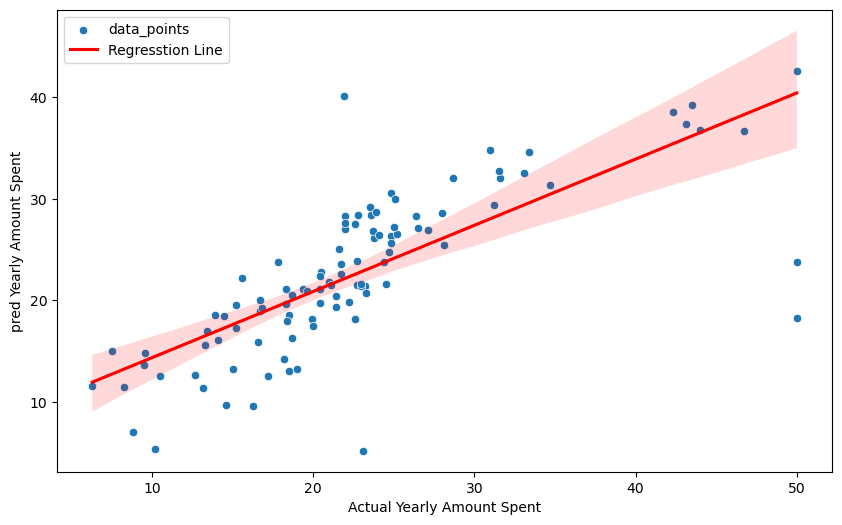

In [24]:
# 산점도와 회귀선 그리기
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test, y = pred, label = 'data_points')
sns.regplot(x = y_test, y = pred, scatter = False, label = "Regresstion Line", color = 'red')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('pred Yearly Amount Spent')
plt.legend()
plt.show()

### p-value가 0.05보다 작은 것만 가져와서 다시 돌려보기

In [30]:
lm2 = ols('주택가격 ~ 범죄율 + 찰스강경계 + 농축_일산화질소 + 가구당평균방수 + 직업센터접근성 + 학생_교사비율 + 흑인비율 + 하위계층비율',
         data = train_data).fit()

In [31]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   주택가격   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     154.2
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          1.73e-116
Time:                        10:41:59   Log-Likelihood:                -1185.3
No. Observations:                 404   AIC:                             2389.
Df Residuals:                     395   BIC:                             2425.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5921      2.597      7.543      0.000      14.486      24.698
범죄율           -6.2562      3.002     -2.084      0.038     -12.159      -0.353
찰스강경계          3.0514      0.926      3.297      0.001       1.232       4.871
농축_일산화질소      -7.6293      1.687     -4.523      0.000     -10.946      -4.313
가구당평균방수       28.9688      2.311     12.536      0.000      24.426      33.512
직업센터접근성      -11.1772      1.899     -5.886      0.000     -14.911      -7.444
학생_교사비율       -8.6395      1.134     -7.622      0.000     -10.868      -6.411
흑인비율           3.4321      1.172      2.929      0.004       1.128       5.736
하위계층비율       -14.8429      1.916     -7.747      0.000     -18.610     -11.076
==============================================================================
Omnibus:                      144.890   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.344
Skew:                           1.534   Prob(JB):                    1.31e-132
Kurtosis:                       8.164   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""